In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import scipy

In [ ]:
# откроем файл и посмотрим как он выглядит

data = pd.read_csv('/content/HR.csv')

data.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# посмотрим на наличие пропусков и типы данных в столбцах (все ок, пропусков нет, типы данных кажется что соответствуют нашим нуждам)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# определим среднее(mean), мин/макс значение для признаков, среднее, моду(50%) и СКО (std)
# Сохраним результат в переменную

stats_bas = data.describe()

stats_bas

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<ipython-input-5-bf44f3d4f352>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), annot= True, linewidth=.5, fmt = '.1g', cmap = 'Set2', cbar_kws= {'orientation': 'horizontal'}, cbar = False)


<Axes: >

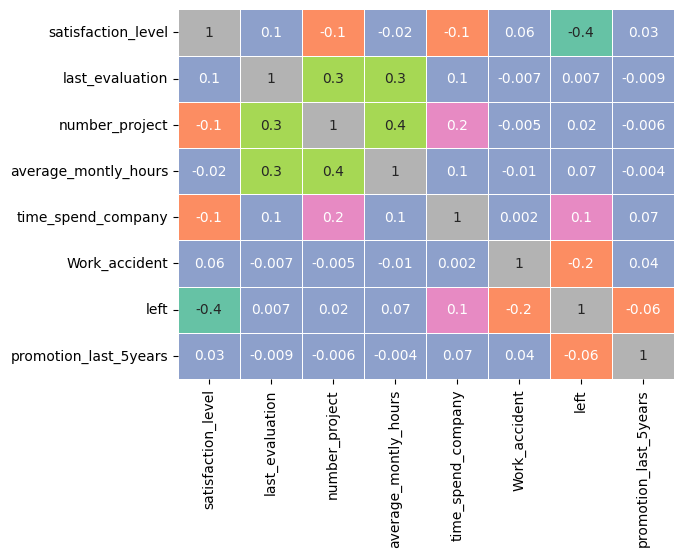

In [ ]:
# Рассчитаем и визуализируем корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные

heatmap = sns.heatmap(data.corr(), annot= True, linewidth=.5, fmt = '.1g', cmap = 'Set2', cbar_kws= {'orientation': 'horizontal'}, cbar = False)

heatmap

#Выводы из матрицы корреляции

Две самые скоррелированные переменные:

1. Количество проектов и Среднее количество часов на работе в месяц - прямая корреляция (коэффициент корреляции = 0.4)
2. Удовлетворенность работой и факт ухода из компании - обратная корреляция (коэффициент корреляции = -0.4)

Две самые нескоррелированные переменные:

1. Несчастные случаи на работе и стаж работы (коэффициент корреляции = 0.002)
2. Повышение за последние 5 лет и Среднее время часов на работе в месяц (коэффициент корреляции = -0.004)

#*Подсчитаем, сколько сотрудников работает в каждом отделе, отделив их от тех, кто уже уволился.*


In [ ]:
data_pers = data.copy()

data_pers = data_pers[data_pers['left'] == 0]

# создаем копию датафрейма, оставляем тех кто работает сейчас
# группируем датафрейм по департаменту, считаем количество строк, показываем первые 10 (работающие), сортируем по количеству, дропаем все столбцы кроме одного для наглядности

data_pers.groupby('department').count().head(10).sort_values('salary', ascending=False).drop(['satisfaction_level', 'last_evaluation' ,	'number_project' ,	'average_montly_hours' ,	'time_spend_company' ,	'Work_accident' ,	'promotion_last_5years', 'left'], axis = 1)

,salary
department,
sales,3126
technical,2023
support,1674
IT,954
product_mng,704
RandD,666
marketing,655
accounting,563
management,539



#*Покажем распределение сотрудников по зарплатам.*


In [ ]:
rasp = data_pers.groupby('salary').count().sort_values('department', ascending= True).head(3).drop(['satisfaction_level', 'last_evaluation' ,	'number_project' ,	'average_montly_hours' ,	'time_spend_company' ,	'Work_accident' ,	'promotion_last_5years', 'left'], axis = 1)
rasp

,department
salary,
high,1155
medium,5129
low,5144


[Text(0.5, 0, 'Group of Salary'),
 Text(0, 0.5, 'People count'),
 Text(0.5, 1.0, 'Salary distribution')]

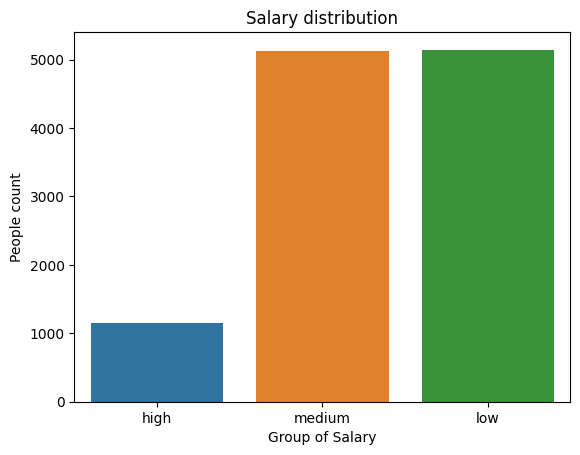

In [ ]:
rasp['salary'] = rasp.index

graph = sns.barplot(rasp, x = 'salary', y = 'department')

graph.set (xlabel='Group of Salary',
 ylabel='People count',
 title='Salary distribution')


#Покажем распределение сотрудников по зарплатам в каждом департаменте по отдельности


In [ ]:
departs = data.groupby(['department', 'salary'],
    ).count(
    ).drop(['satisfaction_level', 'last_evaluation' ,	'number_project' ,	'average_montly_hours' ,	'time_spend_company' ,	'Work_accident' ,	'promotion_last_5years'], axis = 1
    ).rename(columns = {'left' : 'count'})

In [ ]:
departs.sort_values(['department', 'count'], ascending = False).style.bar(cmap='PuOr')

In [ ]:
# Проверим гипотезу, что сотрудники с высоким окладом
# проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


average_montly_hours    199.867421
dtype: float64


<ipython-input-14-94e81818f796>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(mean1.mean())


<Axes: ylabel='Count'>

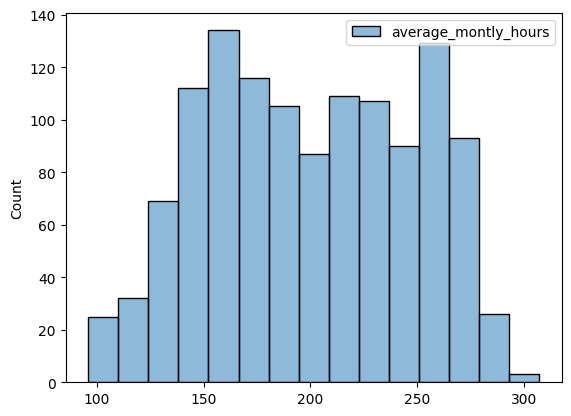

In [ ]:
mean1 = data[data['salary']=='high'].drop(['satisfaction_level', 'last_evaluation' ,	'number_project'  ,	'time_spend_company' ,	'Work_accident' ,	'promotion_last_5years', 'left'], axis=1)

print(mean1.mean())

sns.histplot(data = mean1)

average_montly_hours    200.996583
dtype: float64


<ipython-input-15-d58664e9fbf2>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(mean2.mean())


<Axes: ylabel='Count'>

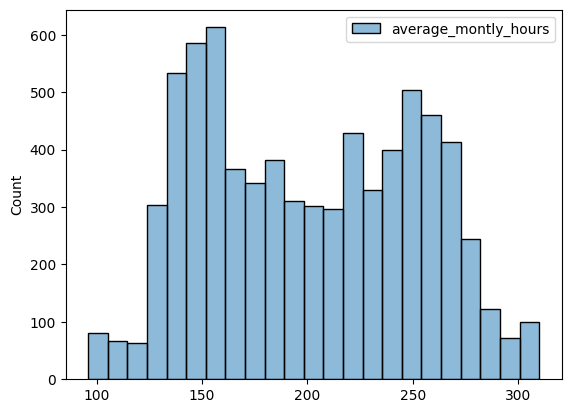

In [ ]:
mean2 = data[data['salary']=='low'].drop(['satisfaction_level', 'last_evaluation' ,	'number_project'  ,	'time_spend_company' ,	'Work_accident' ,	'promotion_last_5years', 'left'], axis=1)

print(mean2.mean())

sns.histplot(data = mean2)

#Средние показывают что мы, вероятно, ошибаемся.

#По графику нельзя однозначно определить, поэтому воспользуемся статистическими методами.

#но можно предположить что распределение стремится к нормальному и мы можем использовать т-тест

In [ ]:
m1 = mean1.drop(['salary', 'department'], axis = 1)
m2 = mean2.drop(['salary', 'department'], axis = 1)

m1 = m1['average_montly_hours'].loc[data['salary'] == 'high']
m2 = m2['average_montly_hours'].loc[data['salary'] == 'low']

In [ ]:
stat, p = scipy.stats.ttest_ind(m1, m2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

# Уровнем статистической значимости выбираем 0,05, нас устроит это число, так как нет высокой важности в более точном уровне
# В качестве нулевой гипотезы выбираем, что средние отличаются значимо и сотрудники с низкой зарплатой в среднем тратят больше времени на работу.

if p < 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, отличаются значимо')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, не различаются значимо')

# Результат тест показал, что средние распределений отличаются незначимо

Статистика = -0.72887, p = 0.46610
Отклоняем нулевую гипотезу, средние, вероятно, не различаются значимо


#Можем сделать вывод, что скорее всего с уровнем значимости 5%, наша гипотеза о существенной разнице в количестве потраченных на работу часов, не верна.

Проверим результат в цикле

In [ ]:
null_hip = 0
nonull = 0

for i in range(1000):
  stat, p = scipy.stats.ttest_ind(m1, m2)
  if p < 0.05:
    null_hip += 1
  else:
    nonull += 1
print(' Подтверждение нулевой гипотезы:',null_hip, '\n', 'Опровержение:', nonull )

# достаточно красочно. но немного смущает, что нет тех 5% ошибок 1 рода, которые мы заложили в наш уровень значимости.

 Подтверждение нулевой гипотезы: 0 
 Опровержение: 1000


In [ ]:

# Рассчитаем следующие показатели среди уволившихся и не
# уволившихся сотрудников (по отдельности):
# ● Доля сотрудников с повышением за последние 5 лет
# ● Средняя степень удовлетворенности
# ● Среднее количество проектов



In [ ]:
# создадим 2 переменные с данными ушедших и неушедших сотрудников

df_left = data.loc[data['left'] == 1]
df_noleft = data.loc[data['left'] == 0]

In [ ]:
print('Отчет по ушедшим сотрудникам:', '\n')

print('Доля повышенных, за последние 5 лет',
      '0 - не было повышения',
      '1 - повышение было' ,
      ' ',
      df_left['promotion_last_5years'].value_counts(normalize=True)*100, sep ='\n')

print('\n', 'Их средняя степень удовлетворенности:' ,
      f'{ round(df_left["satisfaction_level"].mean()*100) }%', sep ='\n')

print('\n', 'Их среднее количество проектов:' ,
      round(df_left["number_project"].mean()), sep ='\n')

Отчет по ушедшим сотрудникам: 

Доля повышенных, за последние 5 лет
0 - не было повышения
1 - повышение было
 
0    99.467936
1     0.532064
Name: promotion_last_5years, dtype: float64


Их средняя степень удовлетворенности:
44%


Их среднее количество проектов:
4


In [ ]:
print('Отчет по работающим сотрудникам:', '\n')

print('Доля повышенных, за последние 5 лет',
      '0 - не было повышения',
      '1 - повышение было' ,
      ' ',
      df_noleft['promotion_last_5years'].value_counts(normalize=True)*100, sep ='\n')

print('\n', 'Их средняя степень удовлетворенности:' ,
      f'{ round(df_noleft["satisfaction_level"].mean()*100) }%', sep ='\n')

print('\n', 'Их среднее количество проектов:' ,
      round(df_noleft["number_project"].mean()), sep ='\n')

Отчет по работающим сотрудникам: 

Доля повышенных, за последние 5 лет
0 - не было повышения
1 - повышение было
 
0    97.374869
1     2.625131
Name: promotion_last_5years, dtype: float64


Их средняя степень удовлетворенности:
67%


Их среднее количество проектов:
4


In [ ]:
# Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился ли
# сотрудник на основе имеющихся факторов (кроме department и
# salary)
# Оценить качество модели на тестовой выборки

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda #lda библиотека
from sklearn.model_selection import train_test_split #для разделения фрейма на тест и тренировку

In [ ]:
# посмотрим есть ли выбросы
# могут быть в average_montly_hours

data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<Axes: ylabel='average_montly_hours'>

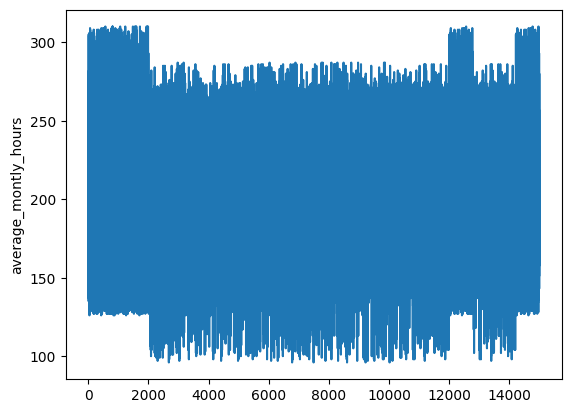

In [ ]:
# визуализируем, могут ли быть выбросы?
# проверим стат.методами

sns.lineplot(data['average_montly_hours'])

In [ ]:
iqrP = data['average_montly_hours'].quantile(0.75)-data['average_montly_hours'].quantile(0.25)
lower_P = data['average_montly_hours'].quantile(0.25)-1.5*iqrP
higher_P = data['average_montly_hours'].quantile(0.75)+1.5*iqrP

outliers_hardness = [ x for x in data['average_montly_hours'] if x<lower_P or x>higher_P ]

print('Выбросы average_montly_hours по рассчетам', outliers_hardness)

# согласно проверке с межквартильным размахом выбросов нет, значит может создать LDA модель, не опасаясь что выбросы окажут сильное влияние

Выбросы average_montly_hours по рассчетам []


In [ ]:
data_model = data.drop( [ 'salary' , 'department' ] , axis = 1) #убираем не интересующие нас данные о salary и department

data_model_left = data_model['left'] #переменная с указанием, ушел человек или нет
data_model_train = data_model.drop('left', axis = 1) # переменная со всеми остальными данными, кроме факт увольнения(или работы)

X_train, X_test, y_train, y_test = train_test_split(data_model_train, data_model_left, random_state=42, test_size = 0.3) #делим выборку на тестовую и тренировочную части

In [ ]:
lda = lda() #просто для удобства переменной

In [ ]:
lda.fit(X_train, y_train) #тренировка

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(X_train) #построение предсказаний

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
round(lda.score(X_test, y_test)*100, 2) #проверка результата, точность модели 75.33%

75.33

In [ ]:
from sklearn. model_selection import RepeatedStratifiedKFold #библиотека для перекрестного анализа результатов
from sklearn. model_selection import cross_val_score #сам перекрестный анализ

In [ ]:
cv = RepeatedStratifiedKFold(n_splits= 10 , n_repeats= 3 , random_state= 1 ) #создаем валидацию

scores = cross_val_score(lda, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) #перекрестный анализ для проверки
print(round(np.mean(scores)*100, 2))  #вывод результата


# Он не сильно отличается от нашего, точность модели - 76.45%

76.45


In [ ]:
# пример использования модели, по трем индексам предсказал что сотрудники не уволились

lda.predict(data_model_train.iloc[[190, 1434, 4795, 9876, 10000, 8000, 8001, 8006]])

array([1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
data.iloc[[190, 1434, 4795, 9876, 10000,8000, 8001, 8006]]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
190,0.09,0.80,7,283,5,0,1,0,technical,low
1434,0.37,0.52,2,140,3,0,1,0,management,medium
4795,0.55,0.81,5,251,3,0,0,0,IT,low
9876,0.93,0.60,4,271,3,0,0,0,accounting,low
10000,0.93,0.49,4,255,2,0,0,0,management,high
8000,0.72,0.90,3,193,3,0,0,0,IT,medium
8001,0.84,0.66,4,204,3,0,0,0,IT,medium
8006,0.56,0.55,3,245,2,0,0,0,IT,medium


## Модель верно предсказала в 7 из 8 случаев

О чем может сказать ошибка модели?

1. Результат попал в 24% погрешности (это нам не даст почвы для работы)
2. Человек ушел, хотя модель предсказала, что нет. Значит нам нужно искать другие факторы, которые повлияли на уход этих людей, если они носят систематический характер, их нужно добавлять в модель и учитывать в работе
3. Человек работает, а модель предсказала, что уже ушел. Возможно этот человек прям осейчас раздумывает над увольнением и мы еще может сохранить его как ценного сотрудинка, отметив какие факторы в его показателях отличаются. Например он давно заслужил повышение или нужно изменить количество проектов.